In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# Data cleaning
* Aggregating 311 Heat/hot water compliants at Zipcode & weekly level
* Aggregating HPD violation Class C at Zipcode & weekly level

## Aggregating 311 Heat/hot water compliants at Zipcode & weekly level

In [2]:
# Laod 311 Complaints related to HPD Heat/Hot water

df_com = pd.read_csv('data/311_heathotwater_2014_2016.csv', usecols = ['Unique Key', 'Created Date', 
                                                                        'Complaint Type', 'Descriptor', 'Incident Zip',
                                                                        'Incident Address'], 
                     parse_dates = ['Created Date'], dtype={'Incident Zip': str}) 

In [3]:
df_com.dtypes

Unique Key                   int64
Created Date        datetime64[ns]
Complaint Type              object
Descriptor                  object
Incident Zip                object
Incident Address            object
dtype: object

In [4]:
# Trick column for the count of complaints
df_com['Count_com'] = 1

# In order to do 'resample', Index of dataframe should be as datetime type
index = df_com['Created Date']
df_com.index = index

In [5]:
df_com.head(2)

,Unique Key,Created Date,Complaint Type,Descriptor,Incident Zip,Incident Address,Count_com
Created Date,,,,,,,
2016-08-10 10:58:37,34057793,2016-08-10 10:58:37,HEAT/HOT WATER,APARTMENT ONLY,10467,855 EAST 217 STREET,1
2016-08-11 12:56:35,34062965,2016-08-11 12:56:35,HEAT/HOT WATER,APARTMENT ONLY,11413,146-62 182 STREET,1


In [6]:
# Resample data based on weekly level (Monday to Sunday)
df_com_resample = df_com.groupby(['Incident Zip']).resample('W-MON')['Count_com'].sum()

# Series to Dataframe
df_com_resample = df_com_resample.to_frame().reset_index()

# Fillna as O (which is non record of Heat and hot water complaints)
df_com_resample = df_com_resample.fillna(0)

# Add columns 'Year', 'Month', and 'Week'
df_com_resample['Year_com'] = pd.DatetimeIndex(df_com_resample['Created Date']).year
df_com_resample['Month_com'] = pd.DatetimeIndex(df_com_resample['Created Date']).month
df_com_resample['Week_com'] = pd.DatetimeIndex(df_com_resample['Created Date']).week

# Make a key columns (Zipcode and Date)
df_com_resample['Zipcode'] = df_com_resample['Incident Zip']
df_com_resample['Date'] = df_com_resample['Created Date']

In [7]:
df_com_resample.head()

,Incident Zip,Created Date,Count_com,Year_com,Month_com,Week_com,Zipcode,Date
0,10001,2014-03-17,9.0,2014,3,12,10001,2014-03-17
1,10001,2014-03-24,9.0,2014,3,13,10001,2014-03-24
2,10001,2014-03-31,9.0,2014,3,14,10001,2014-03-31
3,10001,2014-04-07,17.0,2014,4,15,10001,2014-04-07
4,10001,2014-04-14,2.0,2014,4,16,10001,2014-04-14


## Aggregating HPD violation Class C at Zipcode & weekly level

In [8]:
df_vio = pd.read_csv('data/HMC_Class_C_2014_2016.csv', usecols = ['ViolationID', 'Zip', 'InspectionDate'], 
                     parse_dates = ['InspectionDate'], dtype={'Zip': str}) 

In [9]:
# Trick column for the count of violations
df_vio['Count_vio'] = 1

# In order to do 'resample', Index of dataframe should be as datetime type
index = df_vio['InspectionDate']
df_vio.index = index

In [10]:
df_vio.head(2)

,ViolationID,Zip,InspectionDate,Count_vio
InspectionDate,,,,
2015-03-23,10642313,10003,2015-03-23,1
2015-03-31,10655081,10467,2015-03-31,1


In [11]:
# Resample data based on weekly level (Monday to Sunday)
df_vio_resample = df_vio.groupby(['Zip']).resample('W-MON')['Count_vio'].sum()

# Series to Dataframe
df_vio_resample = df_vio_resample.to_frame().reset_index()

# Fillna as O (which is non record of Heat and hot water complaints)
df_vio_resample = df_vio_resample.fillna(0)

# Add columns 'Year', 'Month', and 'Week'
df_vio_resample['Year'] = pd.DatetimeIndex(df_vio_resample['InspectionDate']).year
df_vio_resample['Month'] = pd.DatetimeIndex(df_vio_resample['InspectionDate']).month
df_vio_resample['Week'] = pd.DatetimeIndex(df_vio_resample['InspectionDate']).week

# Make a key columns (Zipcode and Date)
df_vio_resample['Zipcode'] = df_vio_resample['Zip']
df_vio_resample['Date'] = df_vio_resample['InspectionDate']

In [12]:
df_vio_resample.head()

,Zip,InspectionDate,Count_vio,Year,Month,Week,Zipcode,Date
0,10001,2014-02-03,1.0,2014,2,6,10001,2014-02-03
1,10001,2014-02-10,0.0,2014,2,7,10001,2014-02-10
2,10001,2014-02-17,0.0,2014,2,8,10001,2014-02-17
3,10001,2014-02-24,2.0,2014,2,9,10001,2014-02-24
4,10001,2014-03-03,0.0,2014,3,10,10001,2014-03-03


### Merge data: Complaints + Violations

In [13]:
df = pd.merge(df_com_resample, df_vio_resample, how='outer', on=['Zipcode', 'Date'])

In [14]:
df = df.drop(['Incident Zip', 'Created Date', 'Year_com', 'Month_com', 'Week_com', 'Zip', 'InspectionDate'], axis = 1)

In [15]:
df.head()

,Count_com,Zipcode,Date,Count_vio,Year,Month,Week
0,9.0,10001,2014-03-17,0.0,2014.0,3.0,12.0
1,9.0,10001,2014-03-24,1.0,2014.0,3.0,13.0
2,9.0,10001,2014-03-31,0.0,2014.0,3.0,14.0
3,17.0,10001,2014-04-07,0.0,2014.0,4.0,15.0
4,2.0,10001,2014-04-14,0.0,2014.0,4.0,16.0


In [16]:
print len(df_com_resample)
print len(df_vio_resample)

26137
26547


### Export cleand data as csv files

In [17]:
#df_com_resample.to_csv('data/output/311_heathotwater_2014_2016_weekly.csv')
#df_vio_resample.to_csv('data/output/HMC_Class_C_2014_2016_weekly.csv')

In [18]:
#df.to_csv('data/output/weekly_heathotwater_com_vio.csv')

# Plot timeseries 

In [19]:
df_sample = df[df['Zipcode'] == '10001']

In [20]:
df_sample.head()

,Count_com,Zipcode,Date,Count_vio,Year,Month,Week
0,9.0,10001,2014-03-17,0.0,2014.0,3.0,12.0
1,9.0,10001,2014-03-24,1.0,2014.0,3.0,13.0
2,9.0,10001,2014-03-31,0.0,2014.0,3.0,14.0
3,17.0,10001,2014-04-07,0.0,2014.0,4.0,15.0
4,2.0,10001,2014-04-14,0.0,2014.0,4.0,16.0


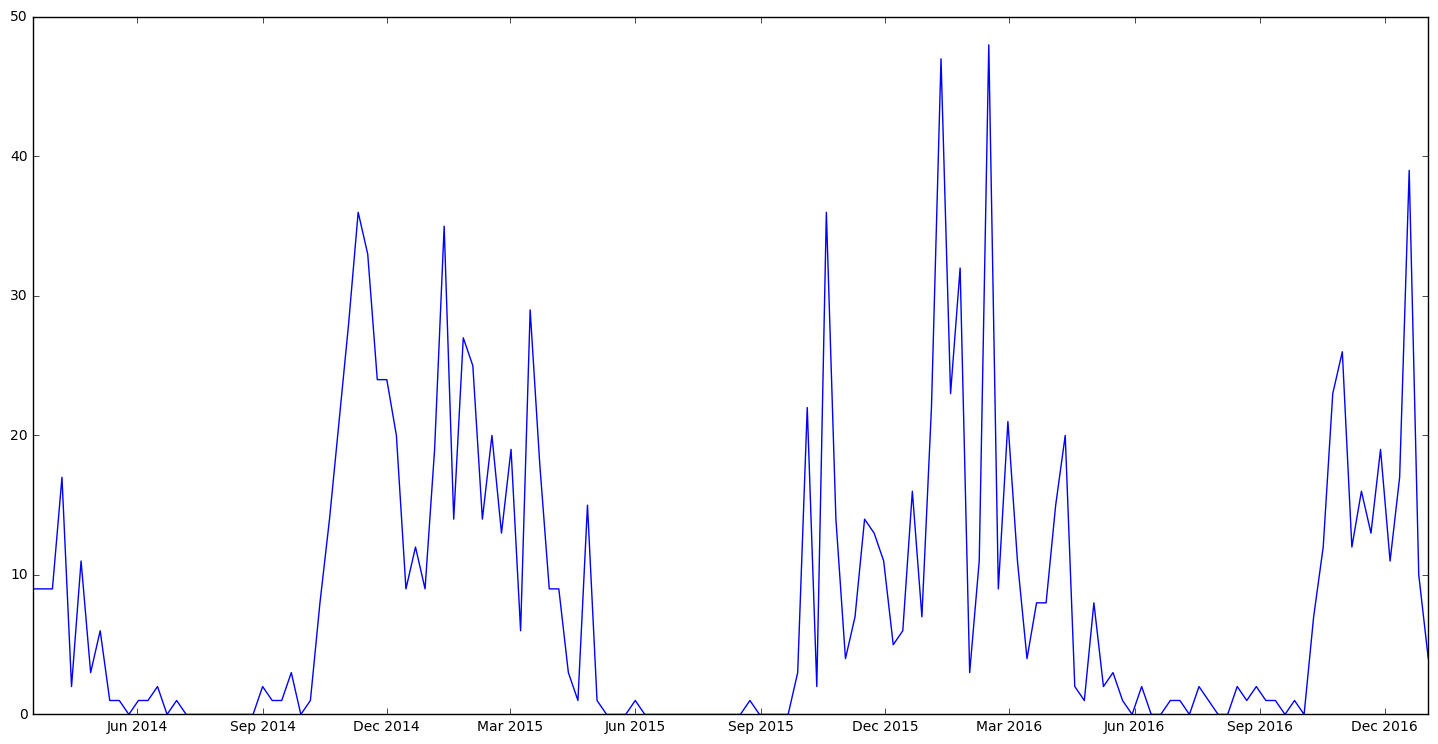

In [21]:
fig = plt.figure(figsize=(18, 9))
plt.plot(df_sample['Date'], df_sample['Count_com'])

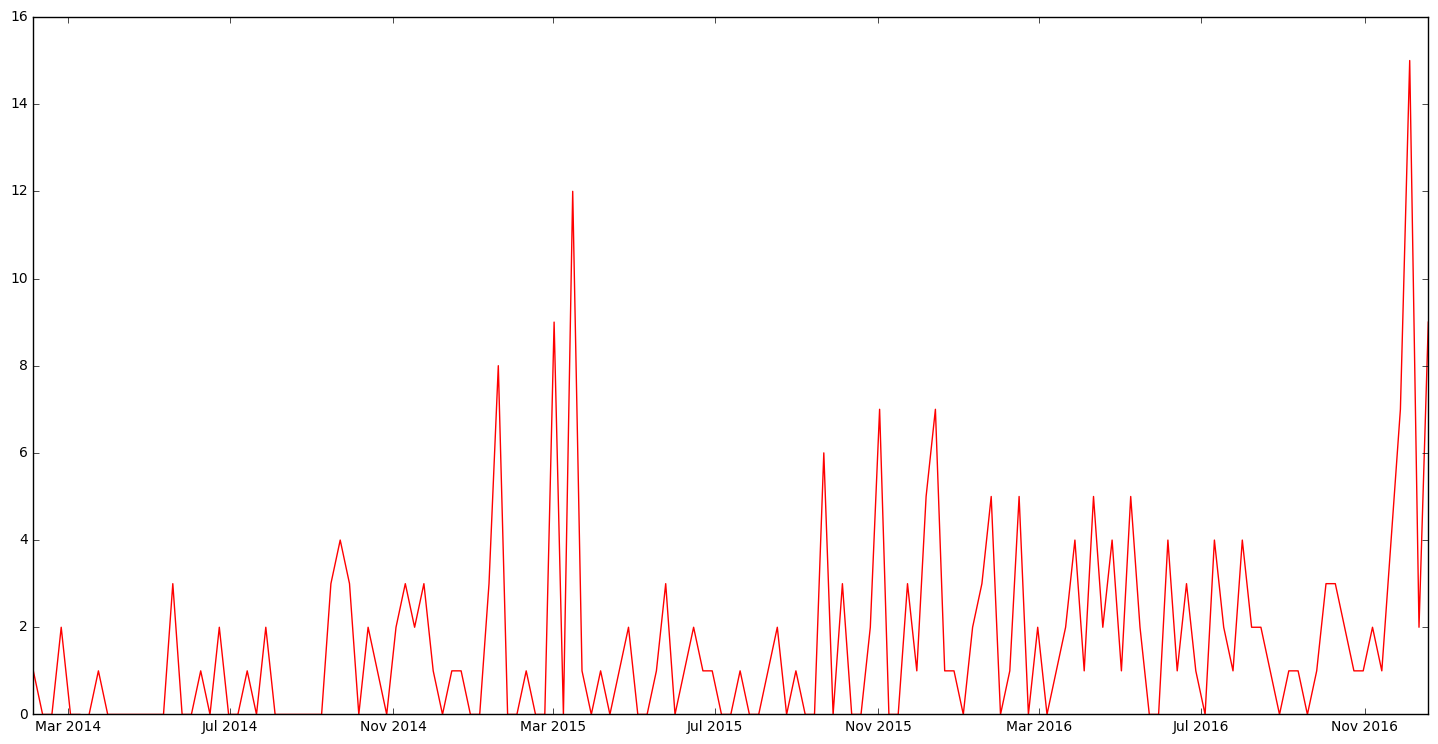

In [22]:
fig = plt.figure(figsize=(18, 9))
plt.plot(df_sample['Date'], df_sample['Count_vio'], color = 'red')